t= [ 0.]
euler = [ 0.002]
runge_kutta= [ 0.002]
exact= 0.002


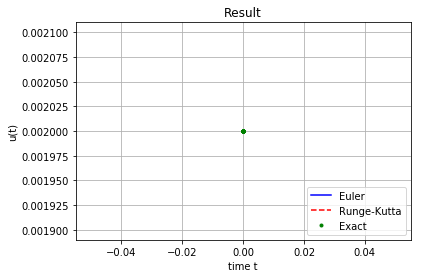

In [27]:
"""
Find the solution for the second order differential equation
u'' = -u
with u(0) = 10 and u'(0) = -5
using the Euler and the Runge-Kutta methods.
This works by splitting the problem into 2 first order differential equations
u' = v
v' = f(t,u)
with u(0) = 10 and v(0) = -5
"""
from math import sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt
rho = 1060 #density of the fluid surrounding the bubble in kg/m^3
p_0 = 3333.05968538 #hydrostatic liquid pressure outside the bubble in Pa
sig = 0.07286 #surface tension of liquid in N/m
R_0 = 0.002 #equilibrium radius of the bubble in m
p_v = 2338.8 #vapour pressure within the bubble in Pa
kap = 1.07 #dimensionless polytropic index
def p(t): #10 kHz sound field of pressure amplitude 2.7 bar
    return 270000*np.sin(2*pi*10000*t)


def f(t, u, v):
    return (1.0/rho*((p_0 + 2.0*sig/R_0 - p_v)*(R_0/u)**(3.0*kap) + p_v - 2.0*sig/u - p_0 - p(t)) - 3.0*v**2.0/2.0)/u

def exact(u0, du0, t):
    # analytical solution
    return u0 * cos(t) + du0 * sin(t)

def iterate(func, u, v, tmax, n):
    dt = tmax/(n-1)
    t = 0.0

    for i in range(n):
        u,v = func(u,v,t,dt)
        t += dt

    return u

def euler_iter(u, v, t, dt):
    v_new = v + dt * f(t, u, v)
    u_new = u + dt * v
    return u_new, v_new

def rk_iter(u, v, t, dt):
    k1 = f(t,u,v)
    k2 = f(t+dt*0.5,u+k1*0.5*dt,v)
    k3 = f(t+dt*0.5,u+k2*0.5*dt,v)
    k4 = f(t+dt,u+k3*dt,v)

    v += dt * (k1+2*k2+2*k3+k4)/6

    # v doesn't explicitly depend on other variables
    k1 = k2 = k3 = k4 = v

    u += dt * (k1+2*k2+2*k3+k4)/6

    return u,v

euler = lambda u, v, tmax, n: iterate(euler_iter, u, v, tmax, n)
runge_kutta = lambda u, v, tmax, n: iterate(rk_iter, u, v, tmax, n)

def plot_result(u, v, tmax, n):
    dt = tmax/(n-1)
    t = 0.0
    allt = []
    error_euler = []
    error_rk = []
    r_exact = []
    r_euler = []
    r_rk = []

    u0 = u_euler = u_rk = u
    v0 = v_euler = v_rk = v

    for i in range(n):
        u = exact(u0, v0, t)
        u_euler, v_euler = euler_iter(u_euler, v_euler, t, dt)
        u_rk, v_rk = rk_iter(u_rk, v_rk, t, dt)
        allt.append(t)
        error_euler.append(abs(u_euler-u))
        error_rk.append(abs(u_rk-u))
        r_exact.append(u)
        r_euler.append(u_euler)
        r_rk.append(u_rk)
        t += dt

    #_plot("error.png", "Error", "time t", "error e", allt, error_euler, error_rk)
    _plot("result.png", "Result", "time t", "u(t)", allt, r_euler, r_rk, r_exact)

def _plot(out, title, xlabel, ylabel, allt, euler, rk, exact=None):
    import matplotlib.pyplot as plt

    plt.title(title)

    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.plot(allt, euler, 'b-', label="Euler")
    plt.plot(allt, rk, 'r--', label="Runge-Kutta")

    if exact:
        plt.plot(allt, exact, 'g.', label='Exact')

    plt.legend(loc=4)
    plt.grid(True)

    plt.savefig(out, dpi=None, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False)

u0 = R_0
du0 = v0 = 0.0
tmax = np.arange(0,0.0002,1000)
n = 1000

print("t=", tmax)
print("euler =", euler(u0, v0, tmax, n))
print("runge_kutta=", runge_kutta(u0, v0, tmax, n))
print("exact=", exact(u0, v0, tmax))

plot_result(u0, v0, tmax*2, n*2)

#t = np.arange(0,0.0002,1000)
#plt.plot(t,exact(u0, v0, t))
plt.show()